<a href="https://colab.research.google.com/github/ScarrryMary/IT_MIPT_group25-26/blob/main/Seminar_6_25_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

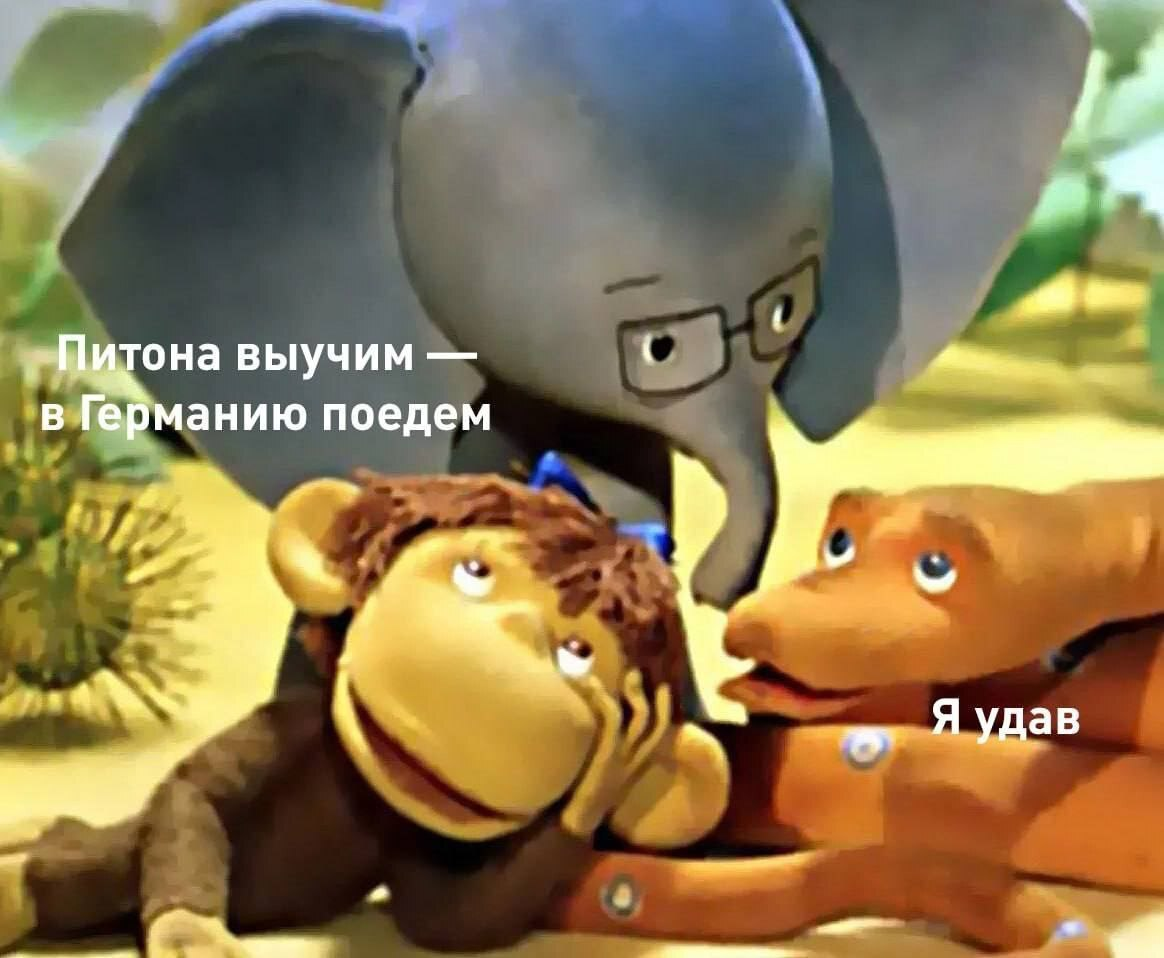

# Решения второго д/з

### **Упражнение 3.3. Предложения**
 Определить количество предложений в заданном текстовом файле.
 Вход. В файле input.txt задан фрагмент текста на английском языке.
 Гарантируется, что в тексте отсутствуют тире, дефисы, цифры и числа.
 Выход. Вывести количество предложений в фрагменте.

In [1]:
def count_sentences_simple(filename):
    with open(filename, 'r') as file:
        text = file.read()

    # Заменяем многоточия на один маркер конца предложения
    text = text.replace('...', '.')

    count = 0
    for char in text:
        if char in '.!?':
            count += 1

    return count

result = count_sentences_simple('input_text.txt')
print(result)

3


### **Упражнение 3.4. Перестановка**
Переставьте соседние элементы в списке. Задача решается в три строки

In [2]:
lst = input().split()
for i in range(0, len(lst) - 1, 2):
  lst[i], lst[i + 1] = lst[i + 1], lst[i]
print(' '.join(lst))

1 2 3 4 5
2 1 4 3 5


### **Упражнение 3.5. Циклический сдвиг**
Выполните циклический сдвиг элементов списка вправо. Решите задачу в две
 строки.

In [3]:
lst = input().split()
print(' '.join(lst[-1:] + lst[:-1]))

1 2 3 4 5
5 1 2 3 4


### **Упражнение 3.6. Уникальные элементы**
 Выведите элементы, которые встречаются в списке только один раз.
 Элементы нужно выводить в том порядке, в котором они встречаются в
 списке.

In [4]:
lst = input().split()
print(' '.join([x for x in lst if lst.count(x) == 1]))

1 2 3 4 5
1 2 3 4 5


### **Упражнение 3.7. Самое частое число**
 Определите, какое число в этом списке встречается чаще всего. Если таких
 чисел несколько, выведите любое из них.

 В этой задаче также нельзя модицифицировать список, использовать
 вспомогательные списки, строки, срезы.

In [5]:
lst = list(map(int, input().split()))
max_count = 0
most_frequent = lst[0]

for i in range(len(lst)):
    count = 0
    for j in range(len(lst)):
        if lst[j] == lst[i]:
            count += 1
    if count > max_count:
        max_count = count
        most_frequent = lst[i]

print(most_frequent)

1 2 3 4 5 6 6
6


### **Упражнение 3.8. Медиана списка**
 В списке — нечетное число элементов, при этом все элементы различны.
 Найдите медиану списка: элемент, который стоял бы ровно посередине
 списка, если список отсортировать.
 При решении этой задачи нельзя модифицировать данный список (в том
 числе и сортировать его), использовать вспомогательные списки.
 Программа получает на вход нечетное число N, в следующей строке заданы N
 элементов списка через пробел.
 Программа должна вывести единственное число — значение медианного
 элемента в списке

In [7]:
n = int(input())
lst = list(map(int, input().split()))

for i in range(n):
    count_less = 0
    for j in range(n):
        if lst[j] < lst[i]:
            count_less += 1
    if count_less == n // 2:
        print(lst[i])
        break

5
1 2 3 4 5
3


# Разминка

Тест на множества: https://pythonist.ru/test-mnozhestva-uroven-lyogkij/

Тест на словари: https://pythonist.ru/test-slovari-uroven-lyogkij/

# Одномерное динамическое программирование


### N-е число Фибоначчи (Мемоизация)


Эту задачу можно решить рекурсивно:

In [9]:
def fibonacchi(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    return fibonacchi(n - 2) + fibonacchi(n - 1)

print(fibonacchi(20))

6765


Однако это будет работать очень долго. 20-е число посчитать еще можно будет, а 40-е число - нет. И не потому, что числа большие. А потому, что мы будем делать слишком много лишней работы. Число операций будет экспоненциально относительно
.

Почему? Потому что, чтобы посчитать N-е число, нам нужно будет независимо посчитать (N-1)-е число и (N-2)-е число, и это в минимум в два раза больше действий, чем нужно для (N-2). А значит, для подсчета N-го числа Фибоначчи необходимо 2 раза посчитать (N-2)-е число, и это занимает в два раза больше времени, а значит это хотя бы

 действий.

Это ну слишком долго, и главное, что это легко исправляется. Давайте просто не считать лишних действий - если мы один раз посчитали, то давайте запомним, чему оно равно, и в следующий раз, когда оно нам понадобится, мы используем его сразу. Удобнее всего сохранить числа Фибоначчи прямо в массиве:

In [18]:
N = 18

fib = [None] * (N + 1) # создали массив из None от 0 до N включительно
fib[0] = 0
fib[1] = 1 # заполнили изначальные позиции
for i in range(2, N + 1): # обходим массив по порядку слева направо
    fib[i] = fib[i - 2] + fib[i - 1] # формула считает новое число через предыдущие!

print(fib[N]) # ответ лежит на N-ом месте

2584


Можно ещё вот так!

In [20]:
def fib(n, cache):
    print(f'called fib({n})')
    if cache[n] is not None:
        return cache[n]
    if n == 0:
        cache[n] = 0
        return 0
    elif n == 1:
        cache[n] = 1
        return 1
    cache[n] = fib(n-1, cache) + fib(n-2, cache)
    return cache[n]

n = 20
cache = [None] * (n + 1)
result = fib(n, cache)
print(f"fib({n}) = {result}")

called fib(20)
called fib(19)
called fib(18)
called fib(17)
called fib(16)
called fib(15)
called fib(14)
called fib(13)
called fib(12)
called fib(11)
called fib(10)
called fib(9)
called fib(8)
called fib(7)
called fib(6)
called fib(5)
called fib(4)
called fib(3)
called fib(2)
called fib(1)
called fib(0)
called fib(1)
called fib(2)
called fib(3)
called fib(4)
called fib(5)
called fib(6)
called fib(7)
called fib(8)
called fib(9)
called fib(10)
called fib(11)
called fib(12)
called fib(13)
called fib(14)
called fib(15)
called fib(16)
called fib(17)
called fib(18)
fib(20) = 6765


Без кэша сложность была бы $O(2^n)$, с кэшем -$O(n)$

Это и называется **динамическим программированием** (или динамикой, ДП). Основная идея состоит в том, чтобы
* свести задачу для N к задаче для чисел, меньших, чем N (с помощью формулы)
* хранить все ответы в массиве
* заполнить начало массива вручную (для которых формула не работает)
* обойти массив и заполнить ответы по формуле
* вывести ответ откуда-то из этого массива

Чтобы решить задачу по динамике вы должны ответить на 5 вопросов:
* Что лежит в массиве? (самый важный вопрос чаще всего)
* Как инициализировать начало массива?
* Как обходить массив? (чаще всего слева направо, но не всегда)
* Какой формулой считать элементы массива?
* Где в массиве лежит ответ?

## Задача о кузнечике

Рассмотрим такую задачу:

Есть полоска 1 * N, кузнечик стоит на первой клетке, он может прыгать вперед на 1, 2 клетки. Сколько есть способов добраться от начальной клетки до последней?

Как решать такие задачи? Нужно придумать рекуррентную формулу, как ответ для N зависит от ответа для меньших чисел.

Очень помогает посмотреть на маленькие числа (!! одна из самых важных идей для придумывания решений):



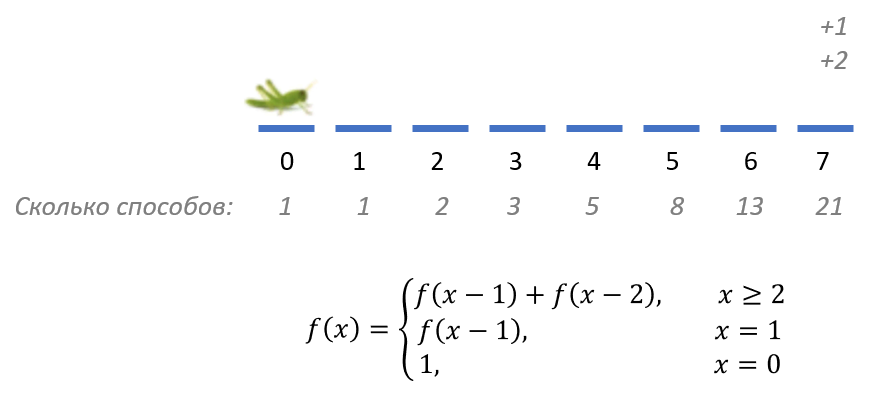

In [25]:
n = int(input())
a = [None] * (n + 1)
a[0] = 1

for i in range(1, n+1):
  if i == 1:
    a[i] = a[0]
  else:
    a[i] = a[i-1] + a[i-2]

print(a[n])


5
8


**Что изменится, если сможем прыгать на 3 клетки вперед?**

### Задача: Кузнечик со штрафом

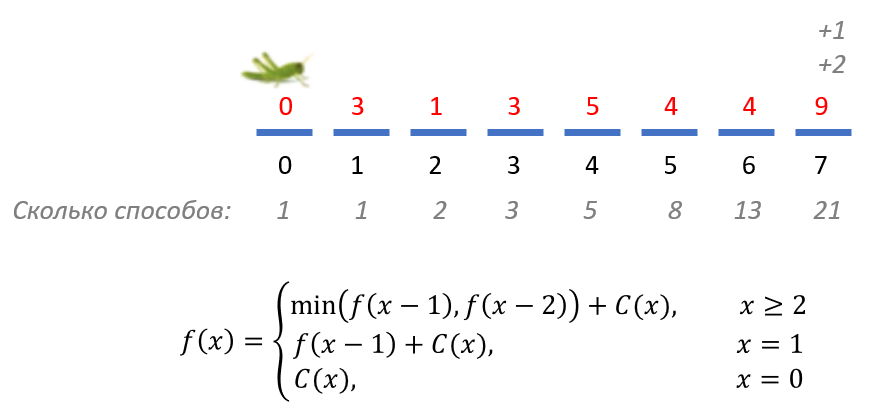

In [27]:
n = int(input())
c = list(map(int, input().split()))
a = [None] * (n + 1)
a[0] = c[0]

for i in range(1, n + 1):
  if i == 1:
    a[i] = a[i-1] + c[i]
  elif i == 2:
    a[i] = min(a[i-1], a[i-2]) + c[i]
  else:
    a[i] = min(a[i-1], a[i-2], a[i-3]) + c[i]

print(a[n-1])

7
0 3 1 3 5 4 4 9
7


### Восстановление пути
Храним либо переходы, либо номера платформ, с которых сделали шаг

In [ ]:
n = int(input())
c = list(map(int, input().split()))
a = [None] * (n)
path = [None] * (n)

# Базовые случаи
a[0] = c[0]
path[0] = -1  # начальная точка

if n > 1:
    a[1] = a[0] + c[1]
    path[1] = 0

for i in range(2, n):
    if a[i-1] < a[i-2]:
        a[i] = a[i-1] + c[i]
        path[i] = i-1
    else:
        a[i] = a[i-2] + c[i]
        path[i] = i-2

print("Min cost:", a[n-1])
print("Path array:", path)

# Восстановление пути
current = n-1
result_path = []
while current >= 0:
    result_path.append(current)
    current = path[current]
result_path.reverse()
print("Path:", result_path)



### Задача: Лесенка-2

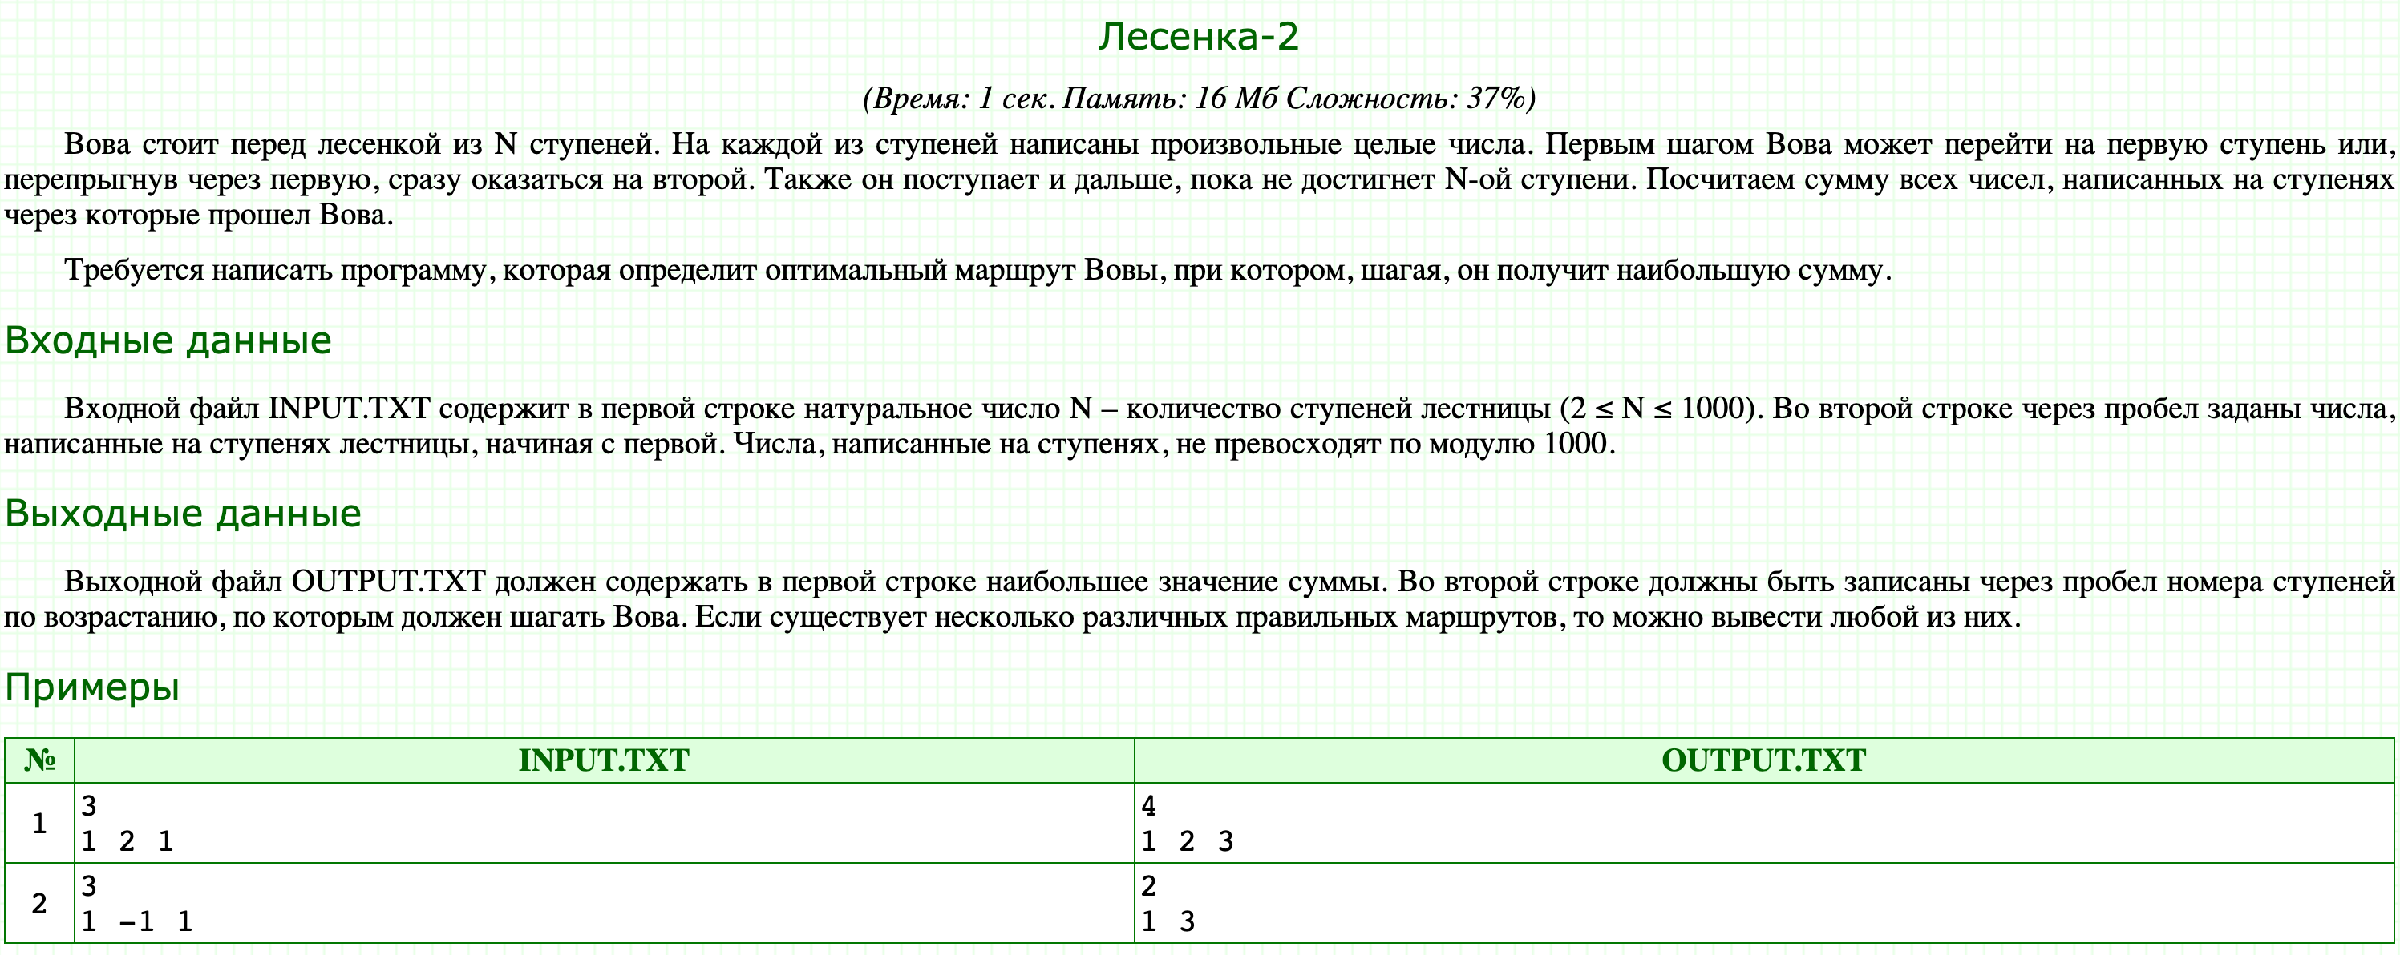

In [33]:
def optim_sum(N, scores):
    scores = [None] + scores
    F = [None] * (N + 1)
    F[1] = scores[1]
    F[2] = max(scores[2], scores[1] + scores[2])

    for i in range(3, N + 1):
        F[i] = scores[i] + max(F[i - 1], F[i - 2])
    return F[N]

print(optim_sum(3, [1, 2, 1]))
print(optim_sum(3, [1, -1, 1]))
print(optim_sum(7, [1, 3, -2, -1, 1, -1, 4]))



4
2
8


### Восстановление пути***

In [1]:
def optim_sum_path(N, scores):
    scores = [None] + scores
    F = [None] * (N + 1)
    F[1] = scores[1]
    F[2] = max(scores[2], scores[1] + scores[2])
    P = [None] * (N + 1)
    P[1] = None

    if scores[2] > scores[1] + scores[2]:
      P[2] = None
    else:
      P[2] = 1

    for i in range(3, N+1):
      F[i] = scores[i] + max(F[i-1], F[i-2])
      if F[i-1] >= F[i-2]:
        P[i] = i-1
      else:
        P[i] = i-2

    path = []
    pos = N
    while P[pos] != None:
      path.append(pos)
      pos = P[pos]

    path.append(pos)
    path.reverse()

    return F[N], path

print(optim_sum_path(3, [1, 2, 1]))

(4, [1, 2, 3])


# Бинарный (двоичный) поиск


Основная последовательность действий алгоритма выглядит так:

* Сортируем массив данных.
* Делим его пополам и находим середину.
* Сравниваем срединный элемент с заданным искомым элементом.  
Если искомое число больше среднего — продолжаем поиск в правой части массива (если он отсортирован по возрастанию): делим ее пополам, повторяя пункт 3. Если же заданное число меньше — алгоритм продолжит поиск в левой части массива, снова возвращаясь к пункту 3.

Левый бинарный поиск:

In [2]:
def left_bin_search(a, x):
  l = 0
  r = len(a)

  while r-l > 1:
    m = (r + l) // 2
    if a[m] < x:
      l = m
    else:
      r = m

  if r < len(a) and a[r] == x:
    return True, r
  else:
    return False


a = [-5, -1, -1, 0, 8, 8, 8, 15]
print(left_bin_search(a, 8))

(True, 4)


Правый бинарный поиск:

In [3]:
def right_bin_search(a, x):
  l = 0
  r = len(a)

  while r-l > 1:
    m = (r + l) // 2
    if a[m] <= x:
      l = m
    else:
      r = m

  if a[l] == x:
    return True, l
  else:
    return False


a = [-5, -1, -1, 0, 8, 8, 8, 15]
print(right_bin_search(a, 8))

(True, 6)


### Упражнение 6.1. Бинарный поиск

Реализуйте алгоритм бинарного поиска для поиска индекса элемента
```python
def bin_search(a, x):
  ...
```
а - массив чисел,
х - искомый элемент  

ИЛИ:

```python
def bin_search(f, y, left, right, eps):
  ...
```
$f = x^3$

```python
print(bin_search(f, 1.5, 0, 10, 1e-4)
```

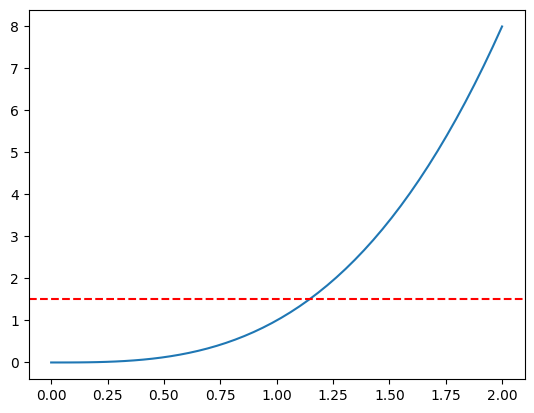

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
  return x**3

x = np.linspace(0, 2)
y = f(x)
plt.plot(x, y)
plt.axhline(y=1.5, color='r', linestyle='--', label='y=0.5')